PANDAS

Import Pandas as the standard alias pd

In [1]:
import pandas as pd


    The standard building block of pandas is the DataFrame. There are many ways to create a dataframe but one of the simplest is to take an already created object and use the DataFrame() method. Because DataFrame() is a method only available within pandas, and not standard python, we use pd.DataFrame.  DataFrames are commonly called df, but can be named anything

In [2]:
my_2d_list = [[3,4,7,3,2],[4,8,9,0,2],[1,7,3,4,2]]
test_df = pd.DataFrame(my_2d_list)
test_df


,0,1,2,3,4
0,3,4,7,3,2
1,4,8,9,0,2
2,1,7,3,4,2


    Panda also has great tools for importing and automatically reading files of different types. Some of the most useful pandas methods that do this are 
    
        pd.read_csv()
        pd.read_excel()
        pd.read_json()
        pd.DataFrame.From_Dict()
   
    What follows these methods and goes in the parantheses is the filepath of the file you want to interface with.
    
    When using these there is also optional arguments after the file name, like nrows = int , which will limit the number of rows accessed. 
    
    EX: pd.read_csv('sample_data.csv', nrows = 10)
   

In [3]:
hero_data = pd.read_csv('heroes_information.csv')
hero_data.head(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


    Once you have your data loaded into a pandas DataFrame, there a few exploratory methods that can give you a good idea of what your data looks like. 
    
    .head(n) and .tail(n) Will show you the beginning and ending of your dataframe respectively
    
    You can also use 
        .info()
            - Total Summary of your df
        .index
            - How many rows you have
        .columns
            - List of all the column names
        .dtypes
            - Produces just the datatype for each column
        .shape
            - Returns a tuple telling you row count, column count
    To get more information about your dataframe
    
    

In [4]:
hero_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


To select single rows based on index, you need to use the .iloc method. DataFrames are zero-indexed so to select the 4th row you would enter 
    
    df.iloc[3]

To count how many null values you have in each column you can use the .isna() function combined with .sum()

In [5]:
hero_data.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [6]:
hero_data.iloc[1]

Unnamed: 0                    1
name                 Abe Sapien
Gender                     Male
Eye color                  blue
Race              Icthyo Sapien
Hair color              No Hair
Height                      191
Publisher     Dark Horse Comics
Skin color                 blue
Alignment                  good
Weight                       65
Name: 1, dtype: object

    Just like list slicing, .iloc[] accepts a colon to select several rows.

In [7]:
hero_data.iloc[2:7]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0


    .iloc[] can be used to select certain rows, and also certain columns. By default it assumes you want all columns, but if you put a comma after your row selection you can specificy which ones by index.

In [8]:
hero_data.iloc[4:6, 7]

4    Marvel Comics
5    Marvel Comics
Name: Publisher, dtype: object

    Of course you can also slice multiple columns!

In [9]:
hero_data.iloc[4:9, 1:6]

,name,Gender,Eye color,Race,Hair color
4,Abraxas,Male,blue,Cosmic Entity,Black
5,Absorbing Man,Male,blue,Human,No Hair
6,Adam Monroe,Male,blue,-,Blond
7,Adam Strange,Male,blue,Human,Blond
8,Agent 13,Female,blue,-,Blond


    It will often be easier to select which columns you want based on the column name rather than the column's numerical index, especially with larger dataframes. This is where .iloc[]'s cousin .loc[] comes in. 
    
    Just like .iloc[], .loc[] takes in the rows, then the columns.
    
    (You can of course always use : to select all rows)

In [10]:
hero_data.loc[:,'Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
729    Female
730      Male
731      Male
732    Female
733      Male
Name: Gender, Length: 734, dtype: object

You can also plug in multiple columns if you use a list as your second element. 

    Notice the resulting dataframe has columns in the new order!

In [11]:
hero_data.loc[:,['Gender','Race','name']]

,Gender,Race,name
0,Male,Human,A-Bomb
1,Male,Icthyo Sapien,Abe Sapien
2,Male,Ungaran,Abin Sur
3,Male,Human / Radiation,Abomination
4,Male,Cosmic Entity,Abraxas
...,...,...,...
729,Female,Human,Yellowjacket II
730,Male,Frost Giant,Ymir
731,Male,Yoda's species,Yoda
732,Female,Human,Zatanna


    You can oftentimes avoid using .loc[] and simply use 
        df['column']

In [12]:
hero_data['Race']

0                  Human
1          Icthyo Sapien
2                Ungaran
3      Human / Radiation
4          Cosmic Entity
             ...        
729                Human
730          Frost Giant
731       Yoda's species
732                Human
733                    -
Name: Race, Length: 734, dtype: object

Where .loc[] becomes really useful is when it's used for filtering via boolean indexing. 
    
    So if we wanted a modified dataframe containing only rows where the 'Gender' column is 'Female' we could use .loc[]

In [13]:
hero_data.loc[ hero_data['Gender'] == 'Female']

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
24,24,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0
25,25,Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0
26,26,Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0
38,38,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0
...,...,...,...,...,...,...,...,...,...,...,...
722,722,Wonder Woman,Female,blue,Amazon,Black,183.0,DC Comics,-,good,74.0
723,723,Wondra,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0
725,725,X-23,Female,green,Mutant / Clone,Black,155.0,Marvel Comics,-,good,50.0
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0


we can also specify which columns we want to see from this filtered dataframe. So if we only wanted to see the names of the female heroes we would do .loc[ boolean statement , ['column'] ]

In [14]:
hero_data.loc[ hero_data['Gender'] == 'Female', ['name']]

,name
8,Agent 13
24,Angel Dust
25,Angel Salvadore
26,Angela
38,Arachne
...,...
722,Wonder Woman
723,Wondra
725,X-23
729,Yellowjacket II


    We can also use.loc[] to change values in a column. This line of code below will change any row where heigh is over 180, and set it to be equal to 180.

In [15]:
#hero_data.loc[ hero_data['Height'] > 180, 'Height'] = 180
hero_data.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


.loc[] can also be used to create new columns. Using the same syntax as above, but instead of the column being a preexisting one, we use the name we want for our new column. 

In [16]:
hero_data.loc[hero_data['Height'] > 160, 'Is Tall'] = True
hero_data.loc[hero_data['Height'] <= 160, 'Is Tall'] = False
hero_data.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Is Tall
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,True
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,True
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,True
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False


 Pandas has a built in method .describe() which will automatically calculate a slew of summary statistics about each column in the dataframe.
 
     Notice the relatively few number of columns in the result, this is because .describe() can only calculate statistics for numerical columns. 

In [17]:
hero_data.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


    Pandas has a huge amount of built in statistics functions, including
        
        .mode()
        .count()
        .std()
        .var()
        .sum()
        .cumsum()
        
   To apply one of these functions to a column, all we need to do is specify that column. Notice the two different ways we can input df column names.

In [18]:
print(hero_data.Weight.mean())
print(' ')
print(hero_data['Weight'].std())

43.8551912568306
 
130.82373271995198


    While we cannot perform calculations on categorical columns, we can use certain methods to glean info from them. Methods like
    
    .unique() which shows all the unique values in a column, sort of like
        a set of the values.
    
    .value_counts() which gives us an ordered count of each unique val in our dataframe column.
    
Sidenote, pandas columns are case sensitive!

In [19]:
hero_data['Skin color'].value_counts()

-                 662
green              21
red                 9
blue                9
white               7
silver              5
grey                5
purple              3
gold                3
pink                2
yellow              2
orange              1
red / black         1
gray                1
orange / white      1
blue-white          1
black               1
Name: Skin color, dtype: int64

To skip a whole bunch of matplotlib nonsense, pandas has the included df.plot() method.

Our plot is going to look absolutley insane, but it was all automatic!

<AxesSubplot:>

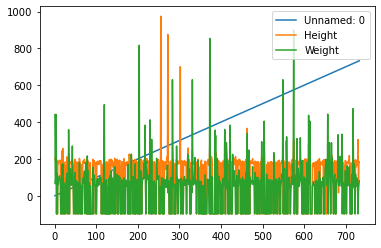

In [20]:
hero_data.plot()

We can further utilize .plot() by specifying columns we want to use, as well as the kind of plot we want. Some kinds available are

    'line'
    'bar'
    'barh'
    'hist'
    'box'
    'scatter'

<AxesSubplot:xlabel='Height', ylabel='Weight'>

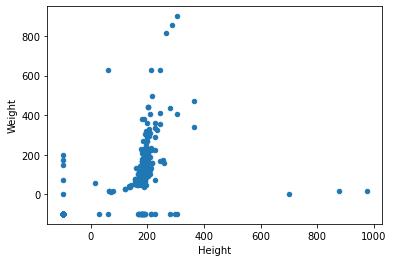

In [21]:
hero_data.plot('Height', 'Weight', kind='scatter')

    To make things more concise when you filter a dataframe, you can premake a list of column names and simply plug it in. 

In [22]:
column_names = ['name', 'Race', 'Publisher']

hero_data[column_names]

,name,Race,Publisher
0,A-Bomb,Human,Marvel Comics
1,Abe Sapien,Icthyo Sapien,Dark Horse Comics
2,Abin Sur,Ungaran,DC Comics
3,Abomination,Human / Radiation,Marvel Comics
4,Abraxas,Cosmic Entity,Marvel Comics
...,...,...,...
729,Yellowjacket II,Human,Marvel Comics
730,Ymir,Frost Giant,Marvel Comics
731,Yoda,Yoda's species,George Lucas
732,Zatanna,Human,DC Comics


Pandas has a built in method for dropping rows with Nan or missing values that can skew things like .mean() or make charts misleading. 

    This method is df = df.dropna()
    
    Make sure to set your dataframe equal to the result .dropna() returns
    
    If you want you can specify which column to sort by Nan values
    
    df = df.dropna(subset=['Publisher'])
    
    
Below notice in the second .info() printout there are fewer rows

In [23]:
hero_data.info()

hero_data = hero_data.dropna()

hero_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
 11  Is Tall     734 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 68.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 733
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  719 non-null    int64  
 1   name        719 non-null 

To create a new column in our dataframe we have several options, we can use .loc[] with its boolean power from before, or if we want to set every value to the same thing we can use the simple syntax below.  

In [24]:
hero_data['IS COOL?'] = 'YEAH'
hero_data.head()

<ipython-input-24-11a037a384ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hero_data['IS COOL?'] = 'YEAH'


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Is Tall,IS COOL?
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,True,YEAH
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,YEAH
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,True,YEAH
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,True,YEAH
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,YEAH


We can also do booleans in this style of column assignment

In [25]:
hero_data['Height x Weight'] = hero_data.Height * hero_data.Weight
hero_data.head()

<ipython-input-25-7a88fbc75ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hero_data['Height x Weight'] = hero_data.Height * hero_data.Weight


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Is Tall,IS COOL?,Height x Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,True,YEAH,89523.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,YEAH,12415.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,True,YEAH,16650.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,True,YEAH,89523.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,YEAH,9801.0


We can also use pandas' .insert() method.

    df.insert(loc=column_location,
                column = 'New_Column_Name'
                value = whatever_value)

In [26]:
hero_data.insert(    loc=11, 
                     column = 'Weight Squared',
                     value = hero_data.Weight ** 2      )
hero_data.head(5)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Weight Squared,Is Tall,IS COOL?,Height x Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,194481.0,True,YEAH,89523.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,4225.0,True,YEAH,12415.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,8100.0,True,YEAH,16650.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,194481.0,True,YEAH,89523.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,9801.0,False,YEAH,9801.0


Pandas has a built in method .groupby() that is super useful for calculating summary statistics on groups of rows, that hav e been grouped by their value in a certain column. 

So if I wanted to sort all my rows into buckets by the value in the 'Gender' column then count how many are in each I could use .groupby()

In [27]:
hero_data.groupby('Gender').count()

,Unnamed: 0,name,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Weight Squared,Is Tall,IS COOL?,Height x Weight
Gender,,,,,,,,,,,,,,
-,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Female,198,198,198,198,198,198,198,198,198,198,198,198,198,198
Male,494,494,494,494,494,494,494,494,494,494,494,494,494,494


.groupby() also supports other summary statistics built into pandas. 

In the cell below we are using the .groupby( ) function to sort our heroes into buckets by gender, then selecting the 'Height' column of the resulting dataframe, then calculating the mean for each group in this column. 

Other agg functions we could have used are

    .min()
    .max()
    .mean()
    .median()
    .count()

In [35]:
hero_data.groupby('Gender')['Height'].mean()

Gender
-          46.703704
Female    100.042929
Male      109.353239
Name: Height, dtype: float64

We can actually specify more than one column by which to group our rows, and create a table with a nested hierarchy by passing in a list of column names instead of just one. 

In [43]:
hero_data.groupby(['Gender', 'Eye color']).count()


Unnamed: 0  name  Race  Hair color  Height  \
Gender Eye color                                                             
-      -                                 8     8     8           8       8   
       black                             1     1     1           1       1   
       blue                              6     6     6           6       6   
       brown                             4     4     4           4       4   
       red                               5     5     5           5       5   
       white                             1     1     1           1       1   
       yellow                            1     1     1           1       1   
       yellow (without irises)           1     1     1           1       1   
Female -                                40    40    40          40      40   
       amber                             1     1     1           1       1   
       black                             5     5     5           5       5   
       blue                             75    75    75          75      75   
       brown                            15    15    15          15      15   
       green                            43    43    43          43      43   
       hazel                             3     3     3           3       3   
       indigo                            1     1     1           1       1   
       purple                            2     2     2           2       2   
       red                               4     4     4           4       4   
       violet                            2     2     2           2       2   
       white                             3     3     3           3       3   
       yellow                            2     2     2           2       2   
       yellow (without irises)           1     1     1           1       1   
       yellow / blue                     1     1     1           1       1   
Male   -                               115   115   115         115     115   
       amber                             1     1     1           1       1   
       black                            16    16    16          16      16   
       blue                            143   143   143         143     143   
       blue / white                      1     1     1           1       1   
       bown                              1     1     1           1       1   
       brown                           104   104   104         104     104   
       gold                              3     3     3           3       3   
       green                            30    30    30          30      30   
       green / blue                      1     1     1           1       1   
       grey                              6     6     6           6       6   
       hazel                             3     3     3           3       3   
       purple                            2     2     2           2       2   
       red                              37    37    37          37      37   
       silver                            1     1     1           1       1   
       white                            13    13    13          13      13   
       white / red                       1     1     1           1       1   
       yellow                           15    15    15          15      15   
       yellow / red                      1     1     1           1       1   

                                Publisher  Skin color  Alignment  Weight  \
Gender Eye color                                                           
-      -                                8           8          8       8   
       black                            1           1          1       1   
       blue                             6           6          6       6   
       brown                            4           4          4       4   
       red                              5           5          5       5   
       white                            1           1          1   

.groupby() returns an altered version of our dataframe, but unlike other methods it does not change our original. So make sure to either assign a new variable, or the original dataframe name equal tot eh result of the groupby.

In [45]:
grouped_heroes = hero_data.groupby(['Gender', 'Eye color']).count()
grouped_heroes

Unnamed: 0  name  Race  Hair color  Height  \
Gender Eye color                                                             
-      -                                 8     8     8           8       8   
       black                             1     1     1           1       1   
       blue                              6     6     6           6       6   
       brown                             4     4     4           4       4   
       red                               5     5     5           5       5   
       white                             1     1     1           1       1   
       yellow                            1     1     1           1       1   
       yellow (without irises)           1     1     1           1       1   
Female -                                40    40    40          40      40   
       amber                             1     1     1           1       1   
       black                             5     5     5           5       5   
       blue                             75    75    75          75      75   
       brown                            15    15    15          15      15   
       green                            43    43    43          43      43   
       hazel                             3     3     3           3       3   
       indigo                            1     1     1           1       1   
       purple                            2     2     2           2       2   
       red                               4     4     4           4       4   
       violet                            2     2     2           2       2   
       white                             3     3     3           3       3   
       yellow                            2     2     2           2       2   
       yellow (without irises)           1     1     1           1       1   
       yellow / blue                     1     1     1           1       1   
Male   -                               115   115   115         115     115   
       amber                             1     1     1           1       1   
       black                            16    16    16          16      16   
       blue                            143   143   143         143     143   
       blue / white                      1     1     1           1       1   
       bown                              1     1     1           1       1   
       brown                           104   104   104         104     104   
       gold                              3     3     3           3       3   
       green                            30    30    30          30      30   
       green / blue                      1     1     1           1       1   
       grey                              6     6     6           6       6   
       hazel                             3     3     3           3       3   
       purple                            2     2     2           2       2   
       red                              37    37    37          37      37   
       silver                            1     1     1           1       1   
       white                            13    13    13          13      13   
       white / red                       1     1     1           1       1   
       yellow                           15    15    15          15      15   
       yellow / red                      1     1     1           1       1   

                                Publisher  Skin color  Alignment  Weight  \
Gender Eye color                                                           
-      -                                8           8          8       8   
       black                            1           1          1       1   
       blue                             6           6          6       6   
       brown                            4           4          4       4   
       red                              5           5          5       5   
       white                            1           1          1   

    We can combine two or more dataframes using the pandas .concat()
    function. This will just slap the dataframes together vertically
    in the order they are passed in. This works because like numpy 
    arrays, pandas dataframes can be concatenated like strings. 

In [50]:
concat_these = [hero_data, hero_data.describe()]
mega_df = pd.concat(concat_these)
mega_df.tail(15)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Weight Squared,Is Tall,IS COOL?,Height x Weight
727,727.000000,Yellow Claw,Male,blue,-,No Hair,188.000000,Marvel Comics,-,bad,95.000000,9025.000000,True,YEAH,17860.000000
728,728.000000,Yellowjacket,Male,blue,Human,Blond,183.000000,Marvel Comics,-,good,83.000000,6889.000000,True,YEAH,15189.000000
729,729.000000,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.000000,Marvel Comics,-,good,52.000000,2704.000000,True,YEAH,8580.000000
730,730.000000,Ymir,Male,white,Frost Giant,No Hair,304.800000,Marvel Comics,white,good,-99.000000,9801.000000,True,YEAH,-30175.200000
731,731.000000,Yoda,Male,brown,Yoda's species,White,66.000000,George Lucas,green,good,17.000000,289.000000,False,YEAH,1122.000000
732,732.000000,Zatanna,Female,blue,Human,Black,170.000000,DC Comics,-,good,57.000000,3249.000000,True,YEAH,9690.000000
733,733.000000,Zoom,Male,red,-,Brown,185.000000,DC Comics,-,bad,81.000000,6561.000000,True,YEAH,14985.000000
count,719.000000,NaN,NaN,NaN,NaN,NaN,719.000000,NaN,NaN,NaN,719.000000,719.000000,NaN,NaN,719.000000
mean,367.877608,NaN,NaN,NaN,NaN,NaN,104.436718,NaN,NaN,NaN,46.184979,19185.386648,NaN,NaN,17206.497775
std,212.774166,NaN,NaN,NaN,NaN,NaN,139.101156,NaN,NaN,NaN,130.675492,59261.669961,NaN,NaN,23900.709994


APIs

    APIs are a mainstay of the modern internet, their basic function is to allow programs to access websites and their data. 
    
    API stands for application programming interface, and is a predetermined communication protocol, where one computer asks for information in a structured way, and the server or website responds with an answer. 
    
    The basic framework of this is an HTTP request. 
    
    An API has three main components
    
        * Access Permissions
            Is the user allowed to have the requested data
        
        * Request
            The actual asking for information
        
        * Response
            The data or service that is the result of the ask
            
A popular python library for making API requests is simply called

    Requests


In [28]:
import requests

Using the request's library's .get() method, we can make our first request!

In [29]:
resp = requests.get('https://www.google.com')

To check that our request went okay, we can test for the status code returned on our response using .status_code

If it evaluates to true then everything went okay!

In [30]:
 resp.status_code == requests.codes.ok

True

To actually view our returned information, we will print out the .text property of our response object

In [31]:
print(resp.text)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="h2t+Pr6nePdW9/TW+vTYWA==">(function(){window.google={kEI:'3V87YY7HNZ-Hxc8PvquokAY',kEXPI:'0,772215,1,530320,56873,954,755,4350,206,4804,2316,383,246,5,1354,4936,314,1122516,1197737,337,208,119,328866,51224,16114,17444,11240,17572,4859,1361,9290,3021,4754,12834,4020,978,13228,3847,4192,6430,1142,17903,2777,919,5081,1593,1279,2212,530,149,1103,840,1983,4314,3514,606,2023,1733,43,521,14670,3229,2843,7,4773,7581,5096,14396,1924,908,2,941,15324,432,3,346,1244,1,5445,148,11323,2652,4,15

Wow thats some crazy shit huh! Unintelligable for now. 

Lets use the .header property of our response object to see if our HTTP request contains useful headers, and we'll make it a dictioanry for easy viewing. 

In [32]:

dict(resp.headers)

{'Date': 'Fri, 10 Sep 2021 13:38:37 GMT',
 'Expires': '-1',
 'Cache-Control': 'private, max-age=0',
 'Content-Type': 'text/html; charset=ISO-8859-1',
 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."',
 'Content-Encoding': 'gzip',
 'Server': 'gws',
 'X-XSS-Protection': '0',
 'X-Frame-Options': 'SAMEORIGIN',
 'Set-Cookie': '1P_JAR=2021-09-10-13; expires=Sun, 10-Oct-2021 13:38:37 GMT; path=/; domain=.google.com; Secure, NID=511=r5D5HEG_Tvm8Xtb2ju_JG7f2T6VaOnXEyQtQFz1cRXn-57a2VlpRZ1vKTHeT4xFDxPXGNTzeQ7pytD5pnAC484X3_MHCuYgMuJeYJP_sGPR1H26lq1dkskU_bl8_CC-5NYcdBSf-Zwvsbmm2ui0lKyFo3T-1LkmryGwV519uzPY; expires=Sat, 12-Mar-2022 13:38:37 GMT; path=/; domain=.google.com; HttpOnly',
 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000,h3-T051=":443"; ma=2592000,h3-Q050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,quic=":443"; ma=2592000; v="46,43"',
 'Transfer-Encoding': 'chunked'}

Because this is now a dictionary, we can access elements of it using [] indeces. 

In [33]:
dict(resp.headers)['Content-Type']

'text/html; charset=ISO-8859-1'

    HTML - HyperText Markup Language 
    
        - A tag, and the content within it are referred to colelctively
            as an element. 
             For example the <p> tag lies at the start adn end of a 
             paragraph element
             
             opening tag
                 content
             closing tag
             
        - The 'Language of the Web'
        
        - Uses tags
            - Your locally downloaded web client interprets these tags
            - tags arent visible to the end user, but they totally 
                define what the end user sees
            - tags can nest inside of each other
         
        - HTML document start with a doctype declaration 
        
        - Two major components
            - Head
                - Holds metadata about the doc
                    - is not displayed on screen
            -Body 
                - the actual content
                
       - Headers change how the document is displayed, and tell search
           engines what the page is about 
       
       - the MDN or Mozilla Developer Network is among the most trusted
           sources on the web for html documentation 
        
       - <a> tags are used for links
       
       - <h1> through <h6> tags are header tags, h1 being the largest
       
       - <div> tag (division) is used to seperate your html doc into 
           chunks.
        
    

CSS - Cascading Style Sheets 

        - language used to make websites look snazzy
        
        - Web developers believe that creating web documents and styling
            web documents are two completely seperate tasks. So HTML is
            used to create web pages, and CSS is used to style them after
        
        - 


    
    Beautiful Soup 
        - Web scraping package